In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
plt.style.use('ggplot')


In [ ]:
# Load in data set
df = pd.read_csv('credit_fraud.csv')
df.head()

4.23  C2020097963   41330.0   36485.77  M1617586706  \
22 TRANSFER  369984.33   C800416232   13024.0       0.00   C999058936   
   PAYMENT    10876.43  C1033824858    3150.0       0.00    M70393637   
   CASH_OUT    6411.65   C926670667  795634.0  789222.35   C202630678   
   PAYMENT     5599.12   C855982693     743.0       0.00  M2030281317   
   PAYMENT    15902.53  C1834766679  126202.6  110300.06    M74713648   

                   0.0      0.0.1    0  0.1  
22 TRANSFER  108863.04  478847.37  0.0  0.0  
   PAYMENT        0.00       0.00  0.0  0.0  
   CASH_OUT       0.00    6411.65  0.0  0.0  
   PAYMENT        0.00       0.00  0.0  0.0  
   PAYMENT        0.00       0.00  0.0  0.0

In [ ]:
# Transform data for the categorical variable (type)
df = pd.get_dummies(df, columns = ['type'])
df = df.drop(columns=['nameOrig', 'nameDest'])
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


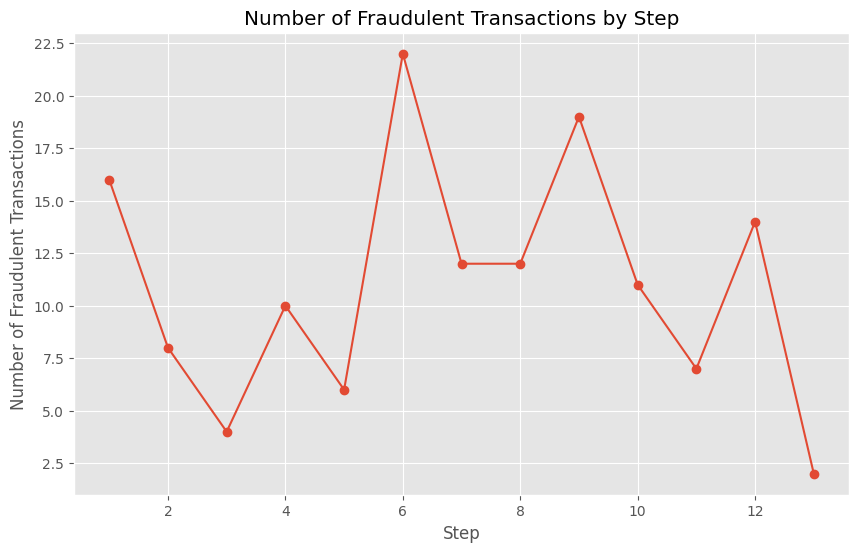

In [ ]:
fraud_counts = df.groupby('step')['isFraud'].sum()
plt.figure(figsize=(10, 6))
plt.plot(fraud_counts.index, fraud_counts.values, marker='o', linestyle='-')
plt.title('Number of Fraudulent Transactions by Step')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.show()

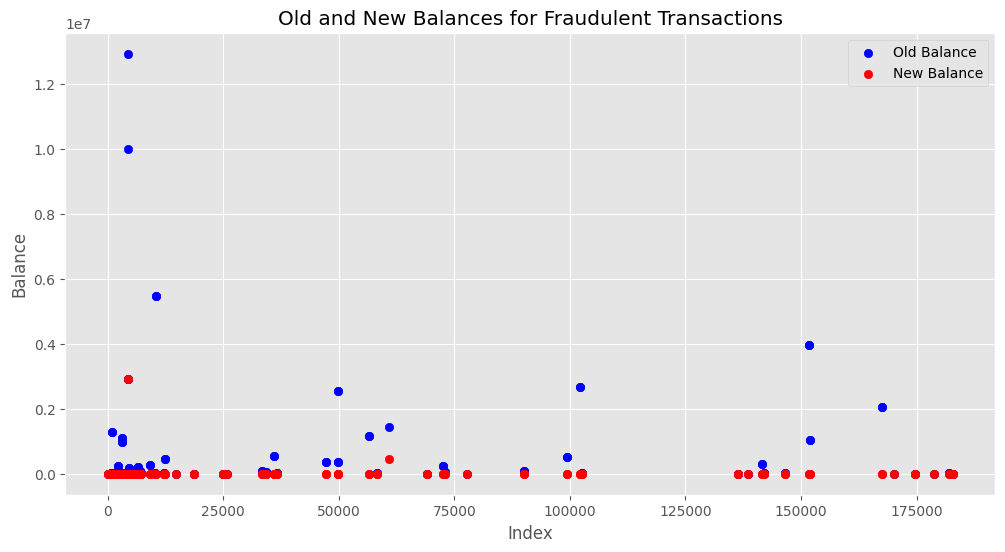

In [ ]:
fraudulent_transactions = df[df['isFraud'] == 1]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for old balance vs index
plt.scatter(fraudulent_transactions.index, fraudulent_transactions['oldbalanceOrg'], color='blue', label='Old Balance')

# Scatter plot for new balance vs index
plt.scatter(fraudulent_transactions.index, fraudulent_transactions['newbalanceOrig'], color='red', label='New Balance')

plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Old and New Balances for Fraudulent Transactions')
plt.legend()
plt.grid(True)
plt.show()

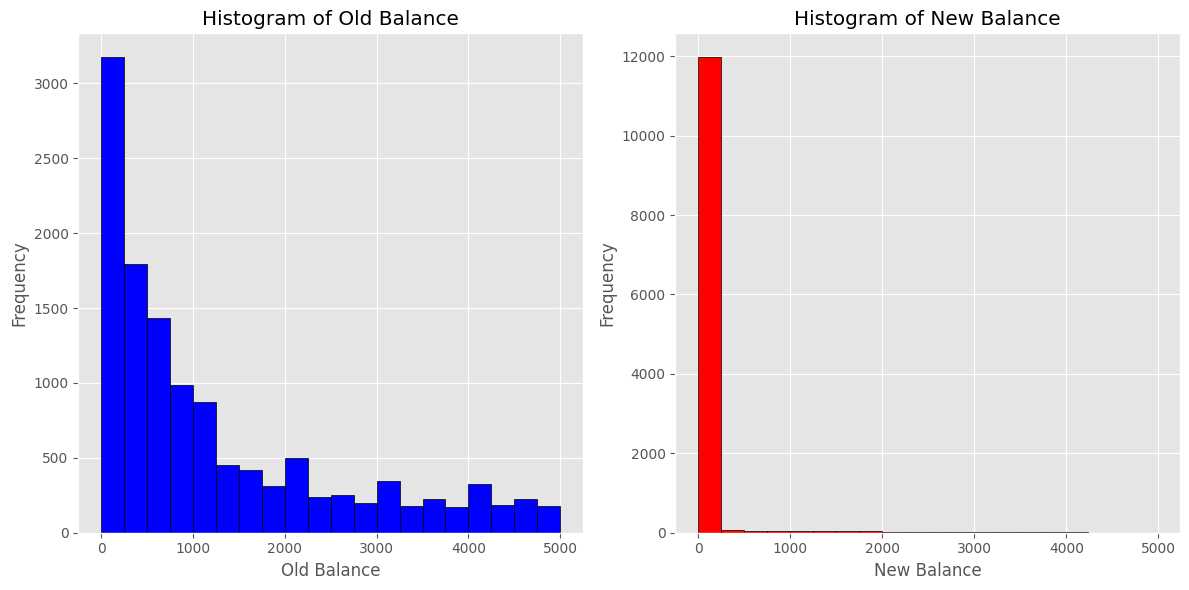

In [ ]:

# Filter data to include only rows where old balance and new balance fall within the specified range
df_filtered = df[(df['oldbalanceOrg'] > 0) & (df['oldbalanceOrg'] <= 5000) & (df['newbalanceOrig'] >= 0) & (df['newbalanceOrig'] <= 5000)]

# Plotting
plt.figure(figsize=(12, 6))

# Histogram for old balance
plt.subplot(1, 2, 1)
plt.hist(df_filtered['oldbalanceOrg'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Old Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Old Balance')

# Histogram for new balance
plt.subplot(1, 2, 2)
plt.hist(df_filtered['newbalanceOrig'], color='red', edgecolor='black', bins=20)
plt.xlabel('New Balance')
plt.ylabel('Frequency')
plt.title('Histogram of New Balance')

plt.tight_layout()
plt.show()

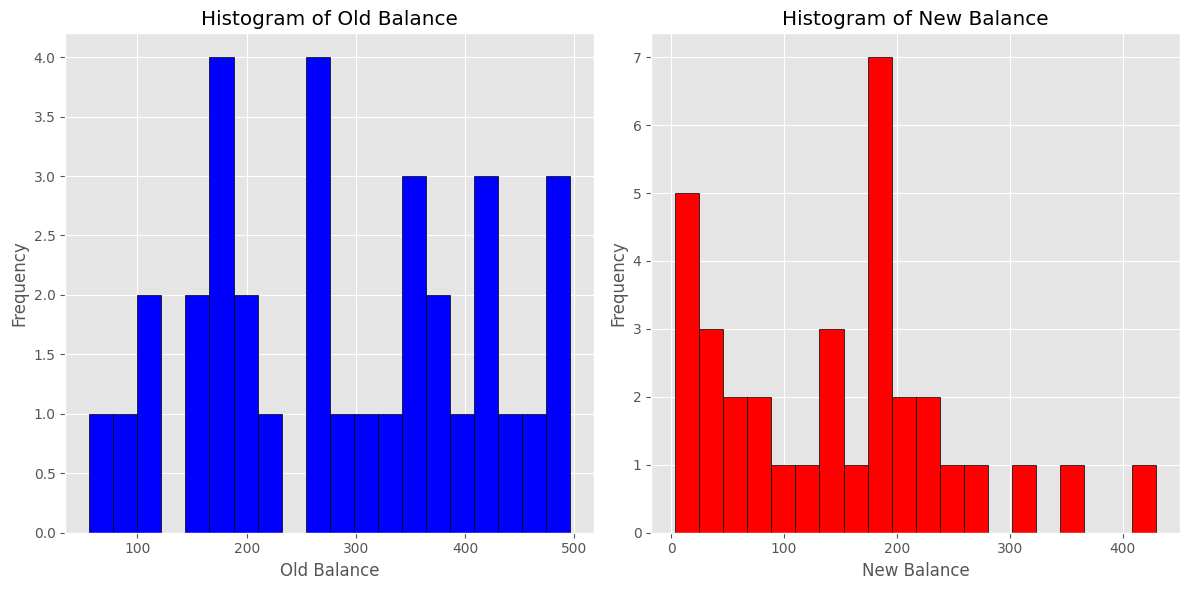

In [ ]:

# Filter data to include only rows where old balance and new balance fall within the specified range
df_filtered = df[(df['oldbalanceOrg'] > 0) & (df['oldbalanceOrg'] <= 500) & (df['newbalanceOrig'] > 0) & (df['newbalanceOrig'] <= 500)]

# Plotting
plt.figure(figsize=(12, 6))

# Histogram for old balance
plt.subplot(1, 2, 1)
plt.hist(df_filtered['oldbalanceOrg'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Old Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Old Balance')

# Histogram for new balance
plt.subplot(1, 2, 2)
plt.hist(df_filtered['newbalanceOrig'], color='red', edgecolor='black', bins=20)
plt.xlabel('New Balance')
plt.ylabel('Frequency')
plt.title('Histogram of New Balance')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram of Transaction Amounts')

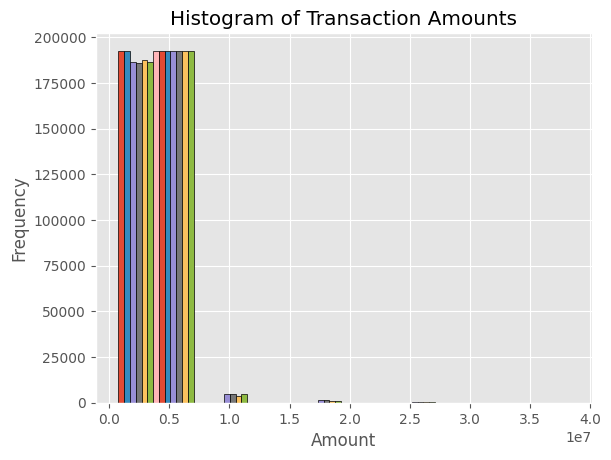

In [ ]:
plt.hist(df[df['amount']>0], edgecolor='black', bins=5)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')

<BarContainer object of 5 artists>

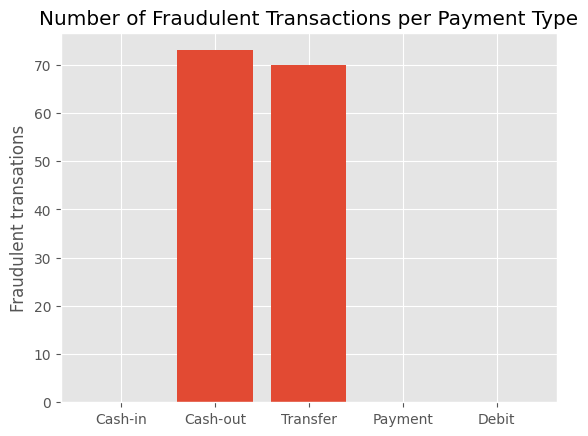

In [ ]:

# debit payment cash out transfer
values = [fraudulent_transactions['type_CASH_IN'].sum(),fraudulent_transactions['type_CASH_OUT'].sum(),fraudulent_transactions['type_TRANSFER'].sum(),fraudulent_transactions['type_PAYMENT'].sum(),fraudulent_transactions['type_DEBIT'].sum()]
columns = ['Cash-in', 'Cash-out', 'Transfer', 'Payment', 'Debit']
plt.title('Number of Fraudulent Transactions per Payment Type')
plt.ylabel('Fraudulent transations')
plt.bar(columns, values)

In [ ]:



nan_values = df.isna()  # or df.isnull()

# Summarize NaN values
nan_sum = nan_values.sum()
print("NaN values in each column:")
print(nan_sum)

#Drop na values???
#df.dropna(inplace=True)

#Data splitting
y=df['isFraud']
X=df.drop(columns=['isFraud'])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)




NaN values in each column:
4.23           0
C2020097963    0
41330.0        1
36485.77       1
M1617586706    1
0.0            1
0.0.1          1
0              1
0.1            1
dtype: int64


KeyError: 'isFraud'

In [ ]:
#Log Reg


#create a model object
model=LogisticRegression(max_iter=400)

#train our model
model.fit(X_train, y_train)

#evaluate the model
y_pred = model.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score on test set:", f1)

#Evaluate the model with cross validation
scorerVar = make_scorer(f1_score, pos_label=1)
L_scores=model_selection.cross_val_score(model, X, y, cv=10, scoring=scorerVar)
print ("f1 scores for each fold",L_scores)
print("average f1 score", L_scores.mean())


0.9993250084373946
F1 score on test set: 0.2352941176470588
f1 scores for each fold [0.27272727 0.52173913 0.22222222 0.         0.21052632 0.
 0.23529412 0.23529412 0.25       0.42105263]
average f1 score 0.23688558080468164


In [ ]:
#SVM learning
df = df.dropna(subset=['isFraud'])
X = df.drop(columns=['isFraud'])
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = svm.SVC(gamma = .01, C = 1)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print(f1_score(y_test,y_hat))

In [ ]:
#Audrey's Code
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Data splitting


y=df['isFraud']
X=df.drop(columns=['isFraud','step'])

pca=PCA(n_components=6)
pca.fit(X)
X=pca.transform(X)


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
print(X_train.shape)

scaler = StandardScaler() #scaling data make f1 increase from like .38 to .58
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)




#This section takes a really long time to run

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of features
num_features = X_train.shape[1]

# Define the RNN model architecture for binary classification
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(num_features,)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



from sklearn.metrics import f1_score

# Predictions on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)





NameError: name 'df' is not defined